## King County House Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import models as ml

from sklearn.model_selection import train_test_split
from dateutil import parser

%matplotlib inline

#### 1), prepare data 

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()
df_train, df_test = train_test_split(df, test_size = 0.2) 

np_train = np.array(df_train)
np_test = np.array(df_test)

np.savez_compressed('./data/kc_house_data.npz', train=np_train, test=np_test)

In [4]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8309,1426049054,20140701T000000,450000.0,3,1.75,1400,13775,1.0,0,0,...,8,1400,0,1963,0,98028,47.7413,-122.259,2200,10450
16757,3392100050,20140625T000000,205000.0,3,1.00,1230,8750,1.0,0,0,...,6,1230,0,1965,0,98003,47.3266,-122.334,1230,8750
18291,7203220300,20140724T000000,895990.0,4,2.75,3555,6565,2.0,0,0,...,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637
18029,2558640110,20140514T000000,498000.0,4,2.75,2270,7375,1.0,0,0,...,7,1290,980,1973,0,98034,47.7222,-122.168,1750,7760
17965,4402700593,20150428T000000,395000.0,2,1.00,1440,7808,1.0,0,0,...,7,860,580,1949,0,98133,47.7431,-122.336,1550,7682


In [5]:
def parse_date(val):
    return parser.parse(val).year

In [6]:
df_train['yr_sold'] = df_train['date'].apply(parse_date)

C:\Users\evitself\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
8309,1426049054,20140701T000000,450000.0,3,1.75,1400,13775,1.0,0,0,...,1400,0,1963,0,98028,47.7413,-122.259,2200,10450,2014
16757,3392100050,20140625T000000,205000.0,3,1.00,1230,8750,1.0,0,0,...,1230,0,1965,0,98003,47.3266,-122.334,1230,8750,2014
18291,7203220300,20140724T000000,895990.0,4,2.75,3555,6565,2.0,0,0,...,3555,0,2014,0,98053,47.6847,-122.017,3625,5637,2014
18029,2558640110,20140514T000000,498000.0,4,2.75,2270,7375,1.0,0,0,...,1290,980,1973,0,98034,47.7222,-122.168,1750,7760,2014
17965,4402700593,20150428T000000,395000.0,2,1.00,1440,7808,1.0,0,0,...,860,580,1949,0,98133,47.7431,-122.336,1550,7682,2015


In [8]:
df_train.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold'], dtype=object)

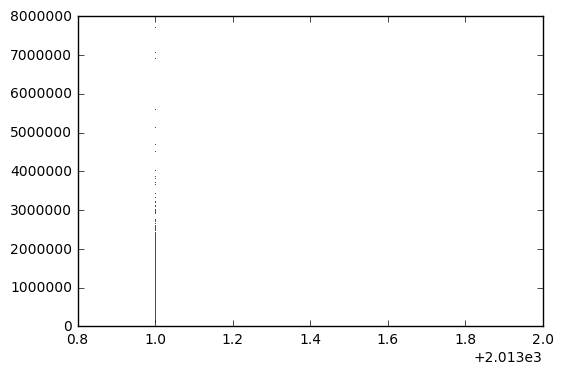

In [9]:
plt.plot(df_train['yr_sold'], df_train['price'], 'r,')
plt.show()

In [10]:
train_data = np.array(df_train)[:,2:]
train_X = train_data[:,1:].astype(np.float32)
train_y = train_data[:,0].astype(np.float32)
train_y = train_y.reshape(train_y.shape[0], 1)

In [11]:
stds_X, means_X = ml.std_normalize(train_X)

In [12]:
std_y, mean_y = ml.std_normalize(train_y.reshape(train_y.shape[0], 1))

#### 2), train linear model

In [13]:
feature_cnt = train_X.shape[1]
sample_cnt = train_X.shape[0]

In [14]:
W, b = ml.create_parameters(feature_cnt)

# batch learning
for epoch in range(0, 10000):
    h = ml.linear_model(train_X, W, b)
    dW, db = ml.mse_cost_dev(train_X, train_y, h)
    W, b = ml.gd_update(W, b, dW, db, lr=0.01)
    if (epoch + 1) % 1000 == 0:
        cur_cost = ml.mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}'.format(epoch + 1, cur_cost))

# finish
predictions = ml.linear_model(train_X, W, b)
final_cost = ml.mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}'.format(final_cost, W, b))

epoch: 1000, cost:[[ 0.15446093]]
epoch: 2000, cost:[[ 0.15024163]]
epoch: 3000, cost:[[ 0.15016424]]
epoch: 4000, cost:[[ 0.15016262]]
epoch: 5000, cost:[[ 0.15016259]]
epoch: 6000, cost:[[ 0.15016259]]
epoch: 7000, cost:[[ 0.15016259]]
epoch: 8000, cost:[[ 0.15016259]]
epoch: 9000, cost:[[ 0.15016259]]
epoch: 10000, cost:[[ 0.15016259]]
training finished!
final cost: [[ 0.15016259]]


#### 3), using keras

In [20]:
from keras.layers import Dense, Activation, Flatten
from keras.layers import BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD

In [16]:
train_X = train_X.reshape((train_X.shape[0], feature_cnt, 1))

In [45]:
mlp = Sequential()

mlp.add(Flatten(input_shape=(feature_cnt, 1)))
mlp.add(Dense(500))
mlp.add(BatchNormalization())
mlp.add(Activation('tanh'))
mlp.add(Dense(300))
mlp.add(BatchNormalization())
mlp.add(Activation('tanh'))
mlp.add(Dense(100))
mlp.add(BatchNormalization())
mlp.add(Activation('tanh'))
mlp.add(Dense(1))
mlp.add(BatchNormalization())
mlp.add(Activation('linear'))

mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 19)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               10000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 500)               2000      
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
activation_13 (Activation)   (None, 300)               0         
__________

In [46]:
sgd = SGD(lr=0.001, momentum=0.5)
adam = Adam(lr=0.001)

mlp.compile(optimizer='adam', 
            loss='mse', 
            metrics=['mae'])

In [47]:
epochs = 100

for epoch in range(0, epochs):
    mlp.fit(train_X,
            train_y,
            batch_size=1000,
            epochs=100,
            verbose=0)

    evl = mlp.evaluate(train_X, 
                 train_y, 
                 batch_size=sample_cnt, 
                 verbose=0)

    print("epoch {0}, cost {1}".format(epoch+1, evl))

print("finished")

epoch 1, cost [0.042596533894538879, 0.15156526863574982]
epoch 2, cost [0.023116141557693481, 0.11406562477350235]
epoch 3, cost [0.017665963619947433, 0.1018495187163353]
epoch 4, cost [0.011753103695809841, 0.081339552998542786]
epoch 5, cost [0.011164415627717972, 0.079401932656764984]
epoch 6, cost [0.0072766509838402271, 0.062301784753799438]
epoch 7, cost [0.0063523086719214916, 0.059343673288822174]
epoch 8, cost [0.006051134318113327, 0.056869737803936005]
epoch 9, cost [0.006089432630687952, 0.059468001127243042]
epoch 10, cost [0.0064008594490587711, 0.06160716712474823]
epoch 11, cost [0.0049832561053335667, 0.053613379597663879]
epoch 12, cost [0.0036616930738091469, 0.044653140008449554]
epoch 13, cost [0.0044356677681207657, 0.051452264189720154]
epoch 14, cost [0.0054807658307254314, 0.0596189945936203]
epoch 15, cost [0.0035088218282908201, 0.045463010668754578]
epoch 16, cost [0.0021140612661838531, 0.033490635454654694]
epoch 17, cost [0.0027109375223517418, 0.038814

In [56]:
def parse_back(h):
    return h*std_y+mean_y

In [59]:
k=2300

In [60]:
parse_back(mlp.predict(train_X[k:k+4,:]))

array([[ 361666.1875 ],
       [ 227042.65625],
       [ 351246.     ],
       [ 214414.3125 ]], dtype=float32)

In [61]:
parse_back(train_y[k:k+4,:])

array([[ 359000.],
       [ 229000.],
       [ 354000.],
       [ 210000.]], dtype=float32)

In [62]:
df_test['yr_sold'] = df_test['date'].apply(parse_date)

C:\Users\evitself\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
test_data = np.array(df_test)[:,2:]
test_X = test_data[:,1:].astype(np.float32)
test_y = test_data[:,0].astype(np.float32)
test_y = test_y.reshape(test_y.shape[0], 1)

In [68]:
ml.data_normalize(test_X, stds_X, means_X)

In [70]:
ml.data_normalize(test_y, std_y, mean_y)

In [77]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

In [79]:
parse_back(mlp.predict(test_X[k:k+10,:]))

array([[ 1623289.     ],
       [  314894.1875 ],
       [  483438.84375],
       [  793371.875  ],
       [  789109.625  ],
       [  658603.8125 ],
       [  212731.78125],
       [  339327.5    ],
       [  911020.1875 ],
       [  587879.875  ]], dtype=float32)

In [80]:
parse_back(test_y[k:k+10,:])

array([[ 1118000.],
       [  295000.],
       [  539000.],
       [  812000.],
       [  888000.],
       [  720000.],
       [  250000.],
       [  329000.],
       [  990000.],
       [  537000.]], dtype=float32)

In [81]:
mlp.evaluate(test_X, test_y, batch_size=test_X.shape[0], verbose=0)

[0.14545422792434692, 0.21197842061519623]